# Principal Component Analysis on Patient Data for Dimension Reduction Code

# Research Question

Can the medical data set be simplified to improve the efficiency of models without losing large amounts of variance?

# Install Necessary Libraries

In [1]:
!pip install pandas
!pip install numpy

# Import Necessary Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load Data Set

In [3]:
#Load csv to a data frame.
medical_df = pd.read_csv('medical_clean.csv')
#Review data frame to ensure all is loaded as expected.
medical_df.info()
#Print data frame.
print(medical_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

# Clean and Prepare Data Set

Check for duplicated values based on the Customer_id variable as the disctionary for the data set stated that this is a unique ID. Remove any duplicated values and review the dataframe.

In [4]:
#Identify and drop duplicated values.
medical_df = medical_df.drop_duplicates(subset='Customer_id', keep='first')
#Review data frame information to see if any drops were made.
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

No duplicate values were found in the data set as none were removed.

Check for null values in the data set.

In [5]:
#Sum all null values based on each variable.
medical_df.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

The list shows that there are no null values in the data set.

There are columns with non-descript titles so those will be updated to reflect a description based on the corresponding response noted by the dictionary for the data set. 

In [6]:
#Rename survey response variables.
medical_df.rename(columns = {'Item1': 'Item1: Timely Admission',
						'Item2': 'Item2: Timely Treatment',
						'Item3': 'Item3: Timely Visits',
						'Item4': 'Item4: Reliability',
						'Item5': 'Item5: Options',
						'Item6': 'Item6: Hours of Treatment',
						'Item7': 'Item7: Courteous Staff',
						'Item8': 'Item8: Evidence of Active Listening from Doc'},
					inplace=True)
#Review data frame to ensure all changes have been made.
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   CaseOrder                                     10000 non-null  int64  
 1   Customer_id                                   10000 non-null  object 
 2   Interaction                                   10000 non-null  object 
 3   UID                                           10000 non-null  object 
 4   City                                          10000 non-null  object 
 5   State                                         10000 non-null  object 
 6   County                                        10000 non-null  object 
 7   Zip                                           10000 non-null  int64  
 8   Lat                                           10000 non-null  float64
 9   Lng                                           10000 non-null  

PCA can only work with continuous variables so any non-numeric variables can be removed.

In [7]:
#Select only the variables that have data type "number".
medical_df = medical_df.select_dtypes('number')
#View the info to see what is remaining.
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   CaseOrder                                     10000 non-null  int64  
 1   Zip                                           10000 non-null  int64  
 2   Lat                                           10000 non-null  float64
 3   Lng                                           10000 non-null  float64
 4   Population                                    10000 non-null  int64  
 5   Children                                      10000 non-null  int64  
 6   Age                                           10000 non-null  int64  
 7   Income                                        10000 non-null  float64
 8   VitD_levels                                   10000 non-null  float64
 9   Doc_visits                                    10000 non-null  

PCA can only work with continuous variables so any discrete variables can be removed.

In [8]:
#Drop discrete variables "Zip" and "Children" with "CaseOrder".
medical_df = medical_df.drop(['Zip', 'Children', 'CaseOrder'], axis=1)
#View the info to see if all is as expected.
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Lat                                           10000 non-null  float64
 1   Lng                                           10000 non-null  float64
 2   Population                                    10000 non-null  int64  
 3   Age                                           10000 non-null  int64  
 4   Income                                        10000 non-null  float64
 5   VitD_levels                                   10000 non-null  float64
 6   Doc_visits                                    10000 non-null  int64  
 7   Full_meals_eaten                              10000 non-null  int64  
 8   vitD_supp                                     10000 non-null  int64  
 9   Initial_days                                  10000 non-null  

# Standardize Data

In [9]:
#Set scaler.
scaler = StandardScaler()
#Fit scaler and transform the data frame.
medical_std = scaler.fit_transform(medical_df)
#View standardized data.
print(medical_std)

[[-0.81466764  0.29713444 -0.47316821 ... -0.50613933 -0.48367167
   0.47042005]
 [-1.46330542  0.39552225  0.09024181 ...  0.46254838 -0.48367167
  -0.48903345]
 [ 0.88696563 -0.35478829  0.48298285 ...  0.46254838 -0.48367167
  -0.48903345]
 ...
 [-0.441353    0.25933168 -0.63634935 ... -1.47482704 -0.48367167
  -1.44848694]
 [ 0.99067638 -0.70849405 -0.65395591 ... -0.50613933  0.49542078
  -0.48903345]
 [ 0.32369816  0.72629512  2.12889296 ...  2.39992381  0.49542078
  -0.48903345]]


# Export Data

In [10]:
#Convert standardized array to a data frame.
medical_std_df = pd.DataFrame(medical_std)
#Export the data set as a .csv file.
medical_std_df.to_csv("medical_std_df.csv")

# PCA Model

In [11]:
# Set PCA model.
pca = PCA(n_components=20)
#Fit and transform PCA model to standardized data.
pca_model = pca.fit_transform(medical_std_df)
#View PCA model.
pca_model

array([[-1.51927931, -1.16545781,  0.5840764 , ..., -0.11878564,
        -0.55385848,  0.10408392],
       [-0.3669284 , -0.81133282,  0.55568937, ...,  0.64889973,
        -0.60205481,  0.12391224],
       [-0.1768332 , -1.65050912,  0.72580565, ...,  1.50611108,
        -0.4987769 , -0.15857565],
       ...,
       [-1.96683389,  1.76833273, -0.24481807, ..., -0.18070781,
        -0.56047167, -0.02184169],
       [ 0.79918214,  1.41089356, -1.11519731, ..., -0.50172446,
         0.21793316, -0.01041605],
       [ 0.64089916,  1.95869318,  0.11226324, ..., -0.46551235,
         0.76565393, -0.11261487]])

In [12]:
#Create matrix for all components.
pca_df = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11', 'PC12', 'PC13', 'PC14', 'PC15', 'PC16', 'PC17', 'PC18', 'PC19', 'PC20'], index=medical_df.columns).T
#Print matrix for all PCA components.
print(pca_df)

           Lat       Lng  Population       Age    Income  VitD_levels  \
PC1   0.008964  0.000729    0.009048  0.006664  0.001123    -0.003326   
PC2  -0.018479 -0.010546    0.029361  0.085471 -0.019874    -0.002735   
PC3  -0.001575  0.011236   -0.031260  0.693786 -0.016889     0.017117   
PC4  -0.016982  0.008909   -0.013232 -0.098148  0.022639    -0.027497   
PC5  -0.715350  0.272658    0.627549  0.010775  0.076125    -0.017846   
PC6  -0.108961  0.019969    0.050666 -0.022538 -0.372067     0.544875   
PC7   0.081546 -0.767536    0.401984 -0.003649  0.198204     0.244225   
PC8  -0.005286  0.369451   -0.210111 -0.006353  0.455009     0.210902   
PC9   0.031917  0.202410   -0.045156 -0.019084 -0.523500     0.376891   
PC10 -0.066441  0.095028   -0.105870 -0.013638  0.493306     0.157951   
PC11 -0.043207 -0.023595    0.054997 -0.017500 -0.283065    -0.652159   
PC12  0.085424  0.029438    0.097334 -0.005064 -0.077394     0.050408   
PC13 -0.659295 -0.380145   -0.593603  0.004115 -0.0

# Scree Plot

The scree plot needs to have the explained variance of each principal component calculated.

In [13]:
#Calculate explained variance ratio for each component.
exp_var_ratio = pca.explained_variance_ratio_
#View the list of explained variance ratios by component.
exp_var_ratio

array([0.14774811, 0.09967996, 0.08582334, 0.08249313, 0.06136057,
       0.05198391, 0.0516876 , 0.05033033, 0.05005829, 0.04882545,
       0.04851433, 0.0385043 , 0.03738376, 0.03480234, 0.02938435,
       0.02666296, 0.02364928, 0.01636515, 0.01415764, 0.00058521])

The scree plot needs to list all principal components.

In [14]:
#Set up list of components.
pc = np.arange(pca.n_components_)+1
#View list of components.
pc

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

Create the scree plot.

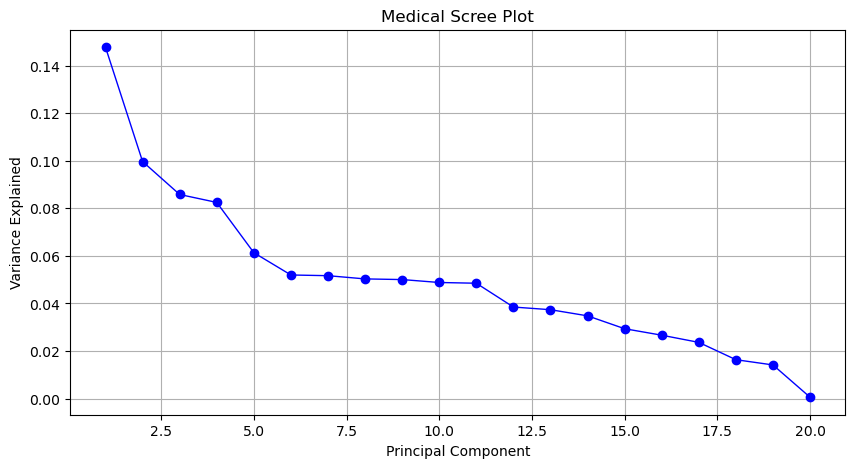

In [15]:
#Set figure size.
plt.figure(figsize=(10,5))
#Set plot.
plt.plot(pc, exp_var_ratio, 'o-', linewidth=1, color='blue')
#Set plot title.
plt.title('Medical Scree Plot')
#Set plot x-axis label.
plt.xlabel('Principal Component')
#Set plot y-axis label.
plt.ylabel('Variance Explained')
#Set plot grid lines.
plt.grid()
#View plot.
plt.show()

Elbow method from the scree plot is showing there is the largest drop in variance explained after the first 6 components.

# Explained Variance Ratio of Principal Components

Show the explained variance for the 6 principal components identified.

In [16]:
#Calculate the explained variance ratios for the components of the PCA.
print("Variance described by PC1 =", round((exp_var_ratio[0]*100), 2), "%")
print("Variance described by PC2 =", round((exp_var_ratio[1]*100), 2), "%")
print("Variance described by PC3 =", round((exp_var_ratio[2]*100), 2), "%")
print("Variance described by PC4 =", round((exp_var_ratio[3]*100), 2), "%")
print("Variance described by PC5 =", round((exp_var_ratio[4]*100), 2), "%")
print("Variance described by PC5 =", round((exp_var_ratio[5]*100), 2), "%")

Variance described by PC1 = 14.77 %
Variance described by PC2 = 9.97 %
Variance described by PC3 = 8.58 %
Variance described by PC4 = 8.25 %
Variance described by PC5 = 6.14 %
Variance described by PC5 = 5.2 %


# Total Variance Explained by Principal Components

Show the total variance explained by the 6 principcal components identified.

In [17]:
#Calculate the total variance.
print("The total variance described is", round((exp_var_ratio.cumsum()[5]*100), 2), "%.")

The total variance described is 52.91 %.
